In [ ]:
# ! pip install -q kaggle

In [245]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [246]:
# import os
# os.environ['username'] = 'rekhalodhi' # username from the json file
# os.environ['key'] = 'b3a5d08ff70b9f6c085a23d12bc9b1a0' # key from the json file

In [ ]:
# !kaggle datasets download -d wordsforthewise/lending-club

 98% 1.24G/1.26G [00:10<00:00, 139MB/s]
100% 1.26G/1.26G [00:10<00:00, 124MB/s]


In [247]:
pwd

'/content/drive/My Drive/major_project'

In [248]:
!ls

data  LICENSE  major_project.ipynb  README.md


In [249]:
%cd /content/drive/MyDrive/major_project

/content/drive/MyDrive/major_project


In [250]:
pwd

'/content/drive/MyDrive/major_project'

In [ ]:
# !unzip '/content/lending-club.zip' -d '/content/drive/MyDrive/major_project/data/'

In [251]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [252]:
accepted_file_path = r'/content/drive/MyDrive/major_project/data/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv'
rejected_file_path = r'/content/drive/MyDrive/major_project/data/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv'

In [253]:
df_accepted = pd.read_csv(accepted_file_path, low_memory = True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [254]:
df_copy = df_accepted.copy(deep = True)

In [ ]:
df_rejected = pd.read_csv(rejected_file_path)

In [ ]:
df_accepted.shape

(2260701, 151)

In [ ]:
pd.set_option('display.max_rows',151)
pd.set_option('display.max_columns',151)

In [ ]:
df_accepted.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
df_accepted['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
df_accepted['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

In [9]:
per_loan_status = (df_accepted['loan_status'].value_counts()/df_accepted.shape[0])*100

In [10]:
per_loan_status

Fully Paid                                             47.629076
Current                                                38.851533
Charged Off                                            11.879457
Late (31-120 days)                                      0.949573
In Grace Period                                         0.373159
Late (16-30 days)                                       0.192374
Does not meet the credit policy. Status:Fully Paid      0.087937
Does not meet the credit policy. Status:Charged Off     0.033662
Default                                                 0.001769
Name: loan_status, dtype: float64

In [255]:
df_accepted = df_accepted.loc[df_accepted['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'])]

In [257]:
df_accepted['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Charged Off                                             268559
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [258]:
per_loan_status = (df_accepted['loan_status'].value_counts()/df_accepted.shape[0])*100
print("percentage of each laon status in loan status column.\n ")
per_loan_status

percentage of each laon status in loan status column.
 


Fully Paid                                             79.871805
Charged Off                                            19.921311
Does not meet the credit policy. Status:Fully Paid      0.147467
Does not meet the credit policy. Status:Charged Off     0.056450
Default                                                 0.002967
Name: loan_status, dtype: float64

In [259]:
df_accepted.shape

(1348099, 151)

In [ ]:
len(list(df_accepted['title'].unique()))        #having large number of unique values

63153

In [ ]:
np.sort(df_accepted['purpose'].unique())

array(['car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding'], dtype=object)

In [ ]:
df_accepted['pymnt_plan'].unique()      #single value so will be dropped

array(['n'], dtype=object)

In [ ]:
np.sort(df_accepted['grade'].unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [ ]:
df_accepted['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
np.sort(df_accepted['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [ ]:
df_accepted.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348099 entries, 0 to 2260697
Data columns (total 151 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   id                                          1348099 non-null  object 
 1   member_id                                   0 non-null        float64
 2   loan_amnt                                   1348099 non-null  float64
 3   funded_amnt                                 1348099 non-null  float64
 4   funded_amnt_inv                             1348099 non-null  float64
 5   term                                        1348099 non-null  object 
 6   int_rate                                    1348099 non-null  float64
 7   installment                                 1348099 non-null  float64
 8   grade                                       1348099 non-null  object 
 9   sub_grade                                   1348099 non-

In [ ]:
df_accepted.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,1348099.0,14408.998913,8716.137925,5.000000e+02,7975.000000,12000.000,20000.000000,4.000000e+04
funded_amnt,1348099.0,14400.187004,8712.249793,5.000000e+02,7950.000000,12000.000,20000.000000,4.000000e+04
funded_amnt_inv,1348099.0,14372.530939,8718.353742,0.000000e+00,7800.000000,12000.000,20000.000000,4.000000e+04
int_rate,1348099.0,13.241562,4.765685,5.310000e+00,9.750000,12.740,15.990000,3.099000e+01
installment,1348099.0,437.777843,261.497190,4.930000e+00,248.280000,375.040,580.220000,1.719830e+03
annual_inc,1348095.0,76237.743295,69922.741975,0.000000e+00,45750.000000,65000.000,90000.000000,1.099920e+07
dti,1347725.0,18.274253,11.155495,-1.000000e+00,11.790000,17.610,24.050000,9.990000e+02
delinq_2yrs,1348070.0,0.317633,0.877744,0.000000e+00,0.000000,0.000,0.000000,3.900000e+01
fico_range_low,1348099.0,696.162233,31.850787,6.100000e+02,670.000000,690.000,710.000000,8.450000e+02


In [260]:
def null_values(df):
        '''This function will take the data frame and will return the 
        number of null values presend  and their percentage in all the columns with their respective names'''

        mis_val = df.isnull().sum()
        mis_val_percent = 100 * mis_val / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename( columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(2)
        print ('Dataframe has ' + str(df.shape[1]) + ' columns.\n'  'There are ' + str(mis_val_table_ren_columns.shape[0]) +  ' columns that have missing values.')
        return mis_val_table_ren_columns

In [261]:
miss_values_accepted = null_values(df_accepted)
miss_values_accepted.head()

Dataframe has 151 columns.
There are 113 columns that have missing values.


,Missing Values,% of Total Values
member_id,1348099,100.00
next_pymnt_d,1345310,99.79
orig_projected_additional_accrued_interest,1344338,99.72
hardship_status,1342343,99.57
hardship_length,1342343,99.57


In [262]:
df_accepted_dropped = df_accepted.drop(df_accepted.loc[:, df_accepted.isna().mean().sort_values() > 0.5].columns, axis=1)

In [263]:
df_accepted_dropped.shape

(1348099, 93)

In [ ]:
miss_values_accepted = null_values(df_accepted_dropped)
miss_values_accepted.head()

Dataframe has 93 columns.
There are 55 columns that have missing values.


,Missing Values,% of Total Values
mths_since_recent_inq,176822,13.12
num_tl_120dpd_2m,120152,8.91
mo_sin_old_il_acct,108325,8.04
emp_title,85950,6.38
emp_length,78550,5.83


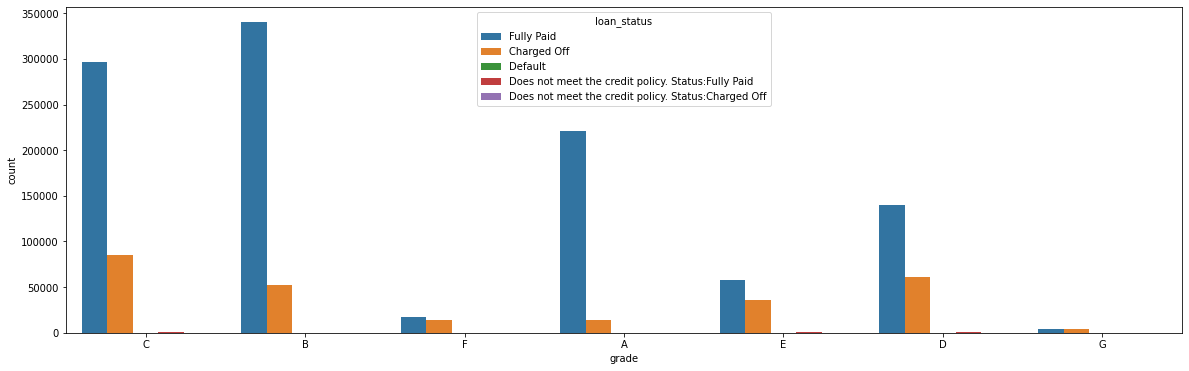

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'grade', hue = 'loan_status', data = df_accepted_dropped)

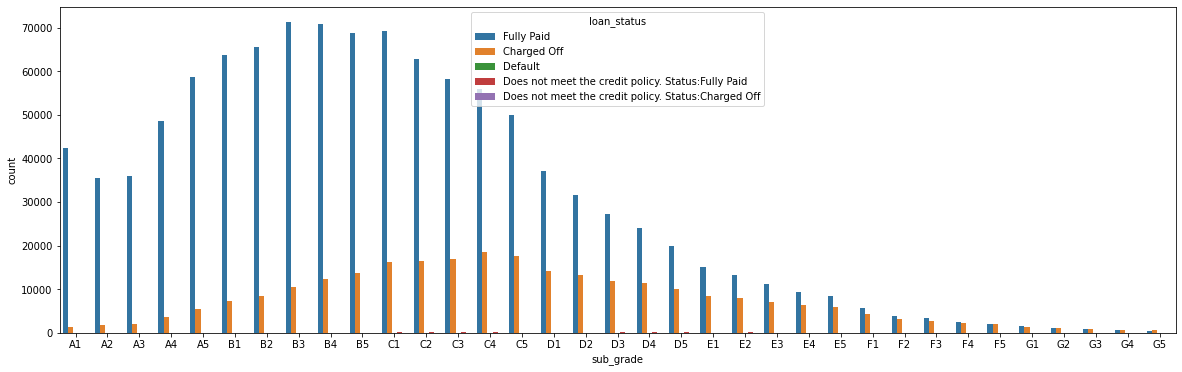

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'sub_grade', hue = 'loan_status', data = df_accepted_dropped, order = sorted(df_accepted_dropped['sub_grade'].unique()))

In [264]:
unneeded_columns = ['id', 'grade', 'emp_title', 'url', 'title', 'zip_code']

In [265]:
df_accepted_dropped = df_accepted_dropped.drop(unneeded_columns, axis=1)

In [ ]:
{column: list(df_accepted_dropped[column].unique()) for column in df_accepted_dropped if df_accepted_dropped.dtypes[column] == 'object'}

{'addr_state': ['PA',
  'SD',
  'IL',
  'GA',
  'MN',
  'SC',
  'RI',
  'NC',
  'CA',
  'VA',
  'AZ',
  'IN',
  'MD',
  'NY',
  'TX',
  'KS',
  'NM',
  'AL',
  'WA',
  'OH',
  'LA',
  'FL',
  'CO',
  'MI',
  'MO',
  'DC',
  'MA',
  'WI',
  'HI',
  'VT',
  'NJ',
  'DE',
  'TN',
  'NH',
  'NE',
  'OR',
  'CT',
  'AR',
  'NV',
  'WV',
  'MT',
  'WY',
  'OK',
  'KY',
  'MS',
  'UT',
  'ND',
  'ME',
  'AK',
  'ID',
  'IA'],
 'application_type': ['Individual', 'Joint App'],
 'debt_settlement_flag': ['N', 'Y'],
 'disbursement_method': ['Cash', 'DirectPay'],
 'earliest_cr_line': ['Aug-2003',
  'Dec-1999',
  'Aug-2000',
  'Jun-1998',
  'Oct-1987',
  'Jun-1990',
  'Feb-1999',
  'Apr-2002',
  'Nov-1994',
  'Jun-1996',
  'Jun-2005',
  'May-1984',
  'Dec-2001',
  'Nov-1993',
  'Mar-2005',
  'May-2004',
  'Jun-1991',
  'May-2000',
  'Oct-2011',
  'May-1994',
  'Jul-2011',
  'May-1991',
  'May-2001',
  'Jun-2002',
  'Dec-1985',
  'Apr-2007',
  'Feb-2002',
  'Jun-2001',
  'Oct-1996',
  'Jan-2005',
  '

In [266]:
df_accepted_dropped.shape

(1348099, 87)

In [267]:
df_accepted_dropped = df_accepted_dropped.drop(['hardship_flag', 'pymnt_plan'], axis=1)

In [ ]:
df_accepted_dropped.select_dtypes('object').head()

,term,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,disbursement_method,debt_settlement_flag
0,36 months,C4,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,debt_consolidation,PA,Aug-2003,w,Jan-2019,Mar-2019,Individual,Cash,N
1,36 months,C1,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,small_business,SD,Dec-1999,w,Jun-2016,Mar-2019,Individual,Cash,N
2,60 months,B4,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,home_improvement,IL,Aug-2000,w,Jun-2017,Mar-2019,Joint App,Cash,N
4,60 months,F1,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,major_purchase,PA,Jun-1998,w,Jul-2016,Mar-2018,Individual,Cash,N
5,36 months,C3,4 years,RENT,Source Verified,Dec-2015,Fully Paid,debt_consolidation,GA,Oct-1987,w,May-2017,May-2017,Individual,Cash,N


Check employement length and set values 0 for smaller than 1 emp_length and 11 for greater than 10 value

In [ ]:
df_accepted_dropped['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year', nan],
      dtype=object)

In [268]:
df_accepted_dropped['emp_length'] = df_accepted_dropped['emp_length'].replace({'< 1 year': '0 years', '10+ years': '11 years'})

In [ ]:
df_accepted_dropped.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C4,11 years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C1,11 years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B4,11 years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F1,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,N
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C3,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,GA,10.20,0.0,Oct-1987,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,May-2017,7653.56,May-2017,759.0,755.0,0.0,1.0,Individual,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,N


In [ ]:
df_accepted_dropped.columns.sort_values()

Index(['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc',
       'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs',
       'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line',
       'emp_length', 'fico_range_high', 'fico_range_low', 'funded_amnt',
       'funded_amnt_inv', 'home_ownership', 'initial_list_status',
       'inq_last_6mths', 'installment', 'int_rate', 'issue_d',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_

In [ ]:
miss_values_accepted = null_values(df_accepted_dropped)
miss_values_accepted.head(52)

Dataframe has 85 columns.
There are 52 columns that have missing values.


,Missing Values,% of Total Values
mths_since_recent_inq,176822,13.12
num_tl_120dpd_2m,120152,8.91
mo_sin_old_il_acct,108325,8.04
emp_length,78550,5.83
pct_tl_nvr_dlq,70430,5.22
avg_cur_bal,70298,5.21
num_rev_accts,70277,5.21
mo_sin_rcnt_rev_tl_op,70277,5.21
mo_sin_old_rev_tl_op,70277,5.21
num_rev_tl_bal_gt_0,70276,5.21


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


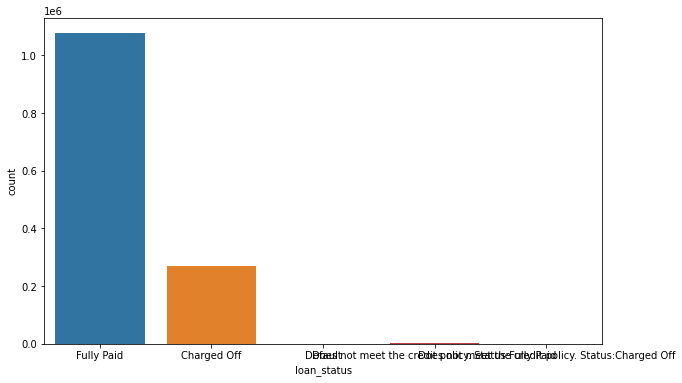

In [23]:
plt.figure(figsize = (10,6))
sns.countplot(df_accepted_dropped.loan_status)

In [269]:
keep_list = ['annual_inc','avg_cur_bal', 'dti', 'emp_length','fico_range_low', 'sub_grade', 'home_ownership', 'initial_list_status',
       'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'pub_rec', 'purpose', 'revol_util', 'term', 'verification_status']

In [270]:
len(keep_list)

18

In [271]:
drop_list = [col for col in df_accepted_dropped.columns if col not in keep_list]
print(drop_list)

['funded_amnt', 'funded_amnt_inv', 'issue_d', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'nu

In [272]:
df_accepted_dropped.drop(labels=drop_list, axis=1, inplace=True)

In [273]:
df_accepted_dropped.shape

(1348099, 18)

In [ ]:
df_accepted_dropped.columns.sort_values()

Index(['annual_inc', 'avg_cur_bal', 'dti', 'emp_length', 'fico_range_low',
       'home_ownership', 'initial_list_status', 'installment', 'int_rate',
       'loan_amnt', 'loan_status', 'mort_acc', 'pub_rec', 'purpose',
       'revol_util', 'sub_grade', 'term', 'verification_status'],
      dtype='object')

In [ ]:
{column: list(df_accepted_dropped[column].unique()) for column in df_accepted_dropped if df_accepted_dropped.dtypes[column] == 'object'}

{'emp_length': ['11 years',
  '3 years',
  '4 years',
  '6 years',
  '7 years',
  '8 years',
  '2 years',
  '5 years',
  '9 years',
  '0 years',
  '1 year',
  nan],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'],
 'initial_list_status': ['w', 'f'],
 'loan_status': ['Fully Paid',
  'Charged Off',
  'Default',
  'Does not meet the credit policy. Status:Fully Paid',
  'Does not meet the credit policy. Status:Charged Off'],
 'purpose': ['debt_consolidation',
  'small_business',
  'home_improvement',
  'major_purchase',
  'credit_card',
  'other',
  'house',
  'vacation',
  'car',
  'medical',
  'moving',
  'renewable_energy',
  'wedding',
  'educational'],
 'sub_grade': ['C4',
  'C1',
  'B4',
  'F1',
  'C3',
  'B2',
  'B1',
  'A2',
  'B5',
  'C2',
  'E2',
  'A4',
  'E3',
  'C5',
  'A1',
  'D4',
  'F3',
  'D1',
  'B3',
  'D3',
  'D5',
  'A5',
  'F2',
  'E4',
  'D2',
  'E1',
  'F5',
  'E5',
  'A3',
  'G2',
  'G1',
  'G3',
  'G4',
  'F4',
  'G5'],
 'term': [' 36 months

# **Encoding categorical variables**

### With the help of OrdinalEncoder() and some lamda function techniques. 
Because Machine learning algorithms and deep learning neural networks require that input and output variables are numbers. This means that categorical data must be encoded to numbers before we can use it to fit and evaluate a model

In [303]:
#deep copy of the data created
df_copy1 = df_accepted_dropped.copy(deep= True) 

In [352]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348099 entries, 0 to 2260697
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   loan_amnt            1348099 non-null  float64
 1   term                 1348099 non-null  object 
 2   int_rate             1348099 non-null  float64
 3   installment          1348099 non-null  float64
 4   sub_grade            1348099 non-null  object 
 5   emp_length           1269549 non-null  object 
 6   home_ownership       1348099 non-null  object 
 7   annual_inc           1348099 non-null  float64
 8   verification_status  1348099 non-null  object 
 9   loan_status          1348099 non-null  object 
 10  purpose              1348099 non-null  object 
 11  dti                  1347725 non-null  float64
 12  fico_range_low       1348099 non-null  float64
 13  pub_rec              1348099 non-null  float64
 14  revol_util           1348099 non-null  float64
 15

In [ ]:
sorted([column for column in df_accepted_dropped if df_accepted_dropped.dtypes[column] == 'object'])

['emp_length',
 'home_ownership',
 'initial_list_status',
 'loan_status',
 'purpose',
 'sub_grade',
 'term',
 'verification_status']

In [353]:
df_copy1['home_ownership'] = df_copy1['home_ownership'].replace(['ANY', 'NONE'], 'OTHER')   #replacing 'ANY','NONE' with the 'OTHER'
df_copy1['emp_length'] = df_copy1['emp_length'].fillna('0 year')                            #replacing 'nan values with the zero'

In [354]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()           #creating object for the ordinal encoder      

In [355]:
#employement length

df_copy1['emp_length'].unique()                                                            #find unique values in the emp_length column.

array(['11 years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '0 years', '1 year', '0 year'],
      dtype=object)

In [356]:
df_copy1['emp_length'] = df_copy1['emp_length'].apply(lambda s: int(s[0:2]))                #slicing and changing values to int
np.sort(df_copy1['emp_length'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11])

In [357]:
#home_ownership

np.sort(df_copy1['home_ownership'].unique()) 

array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object)

In [358]:
df_copy1['home_ownership'] = ord_enc.fit_transform(df_copy1[['home_ownership']])          #fitting and transforming 'home_ownership' column
np.sort(df_copy1['home_ownership'].unique())        

array([0., 1., 2., 3.])

In [359]:
#initial_list_status

in_ls = df_copy1['initial_list_status'].unique()
print(in_ls)


['w' 'f']


In [360]:
df_copy1['initial_list_status'] = ord_enc.fit_transform(df_copy1[['initial_list_status']])
df_copy1['initial_list_status'].unique()

array([1., 0.])

In [361]:
# loan_status

np.sort(df_copy1['loan_status'].unique())                    #find unique values in loan_status column

array(['Charged Off', 'Default',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid'],
      dtype=object)

In [362]:
df_copy1['loan_status'] = ord_enc.fit_transform(df_copy1[['loan_status']])        #fit and transform data in laon status column
np.sort(df_copy1['loan_status'].unique())

array([0., 1., 2., 3., 4.])

In [363]:
#purpose

df_copy1['purpose'].unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [364]:
df_copy1['purpose'] = ord_enc.fit_transform(df_copy1[['purpose']])
df_copy1['purpose'].unique()

array([ 2., 11.,  4.,  6.,  1.,  9.,  5., 12.,  0.,  7.,  8., 10., 13.,
        3.])

In [365]:
#sub_grade

np.sort(df_copy1['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [366]:
df_copy1['sub_grade'] = ord_enc.fit_transform(df_copy1[['sub_grade']])
df_copy1['sub_grade'].unique()

array([13., 10.,  8., 25., 12.,  6.,  5.,  1.,  9., 11., 21.,  3., 22.,
       14.,  0., 18., 27., 15.,  7., 17., 19.,  4., 26., 23., 16., 20.,
       29., 24.,  2., 31., 30., 32., 33., 28., 34.])

In [367]:
#term

df_copy1['term'] = df_copy1['term'].apply(lambda s: s[0:3])                            #slicing values
df_copy1['term'] = ord_enc.fit_transform(df_copy1[['term']])                         #applying ordinal encoder and converting categorical(obj) --> int  
df_copy1['term'].unique()


array([0., 1.])

In [368]:
# verification_status

df_copy1['verification_status'] = ord_enc.fit_transform(df_copy1[['verification_status']])
df_copy1['verification_status'].unique()

array([0., 1., 2.])

In [369]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348099 entries, 0 to 2260697
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   loan_amnt            1348099 non-null  float64
 1   term                 1348099 non-null  float64
 2   int_rate             1348099 non-null  float64
 3   installment          1348099 non-null  float64
 4   sub_grade            1348099 non-null  float64
 5   emp_length           1348099 non-null  int64  
 6   home_ownership       1348099 non-null  float64
 7   annual_inc           1348099 non-null  float64
 8   verification_status  1348099 non-null  float64
 9   loan_status          1348099 non-null  float64
 10  purpose              1348099 non-null  float64
 11  dti                  1347725 non-null  float64
 12  fico_range_low       1348099 non-null  float64
 13  pub_rec              1348099 non-null  float64
 14  revol_util           1348099 non-null  float64
 15

# **Rejecting** **Outliers from the dataset**

### Here to remove outliers, I have used the IQR( Inter quartile range ) method, data visualization (distribution plot, bar plot). 

Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers from the dataset. They can also impact the basic assumption of Regression and other statistical model assumptions.
With all these reasons we must be careful about outlier and treat them before build a statistical/machine learning model.

In [293]:
miss_values_accepted = null_values(df_copy)
miss_values_accepted.head(6)

Dataframe has 151 columns.
There are 150 columns that have missing values.


,Missing Values,% of Total Values
member_id,2260701,100.00
orig_projected_additional_accrued_interest,2252050,99.62
hardship_dpd,2249784,99.52
hardship_status,2249784,99.52
deferral_term,2249784,99.52
hardship_amount,2249784,99.52


In [294]:
def reject_outliers(sr, iq_range=0.5, side='left', return_mask=False):
    '''
    Takes an array (or pandas series) and returns an array with outliers excluded, according to the
    interquartile range.
    
    Parameters:
    -----------
    sr: array
        array of numeric values
    iq_range: float
        percent to calculate quartiles by, 0.5 will yield 25% and 75%ile quartiles
    side: string
        if 'left', will return everything below the highest quartile
        if 'right', will return everything above the lowest quartile
        if 'both', will return everything between the high and low quartiles

        but in this case, as we want most of the time values only below the highest quartile so the side by default will remain 'left' 
    '''
    pcnt = (1 - iq_range) / 2
    qlow, median, qhigh = sr.dropna().quantile([pcnt, 0.50, 1-pcnt])
    
    iqr = qhigh - qlow
    print(qlow, median, qhigh, iqr)

    if side=='both':
        mask = (sr - median).abs() <= iqr
    elif side=='left':
        mask = (sr - median) <= iqr
    elif side=='right':
        mask = (sr - median) >= iqr
    else:
        print('options for side are left, right, or both')
    
    if return_mask:
        return mask
    
    return sr[mask]

In [295]:
def plot_feature(sr, iq_range, return_mask, side ='left'):
  '''Take an array call reject_outliers function and return an array '''

  no_outliers = reject_outliers(sr = sr, iq_range = iq_range, return_mask = return_mask, side = side)
  df_no_outlier =  sr.loc[no_outliers]              #create a dataset with no outliers to plot a distribution plot 
  sns.distplot(df_no_outlier, kde = False)
  return no_outliers


In [296]:
df_copy1.shape

(1348099, 18)

In [297]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348099 entries, 0 to 2260697
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   loan_amnt            1348099 non-null  float64
 1   term                 1348099 non-null  float64
 2   int_rate             1348099 non-null  float64
 3   installment          1348099 non-null  float64
 4   sub_grade            1348099 non-null  float64
 5   emp_length           1348099 non-null  int64  
 6   home_ownership       1348099 non-null  float64
 7   annual_inc           1348095 non-null  float64
 8   verification_status  1348099 non-null  float64
 9   loan_status          1348099 non-null  float64
 10  purpose              1348099 non-null  float64
 11  dti                  1347725 non-null  float64
 12  fico_range_low       1348099 non-null  float64
 13  pub_rec              1348070 non-null  float64
 14  revol_util           1347202 non-null  float64
 15

In [77]:
df_copy1['dti'].median()

17.61

In [304]:
df_copy1.groupby(by = 'loan_status')['dti'].agg([np.mean, np.std])

,mean,std
loan_status,,
Charged Off,20.171196,11.831747
Default,17.263250,10.118348
Does not meet the credit policy. Status:Charged Off,14.343732,7.187256
Does not meet the credit policy. Status:Fully Paid,14.107173,7.400106
Fully Paid,17.811629,10.935927


In [305]:
df_copy1.groupby(by = 'dti')['annual_inc'].agg([np.mean, np.std])

,mean,std
dti,,
-1.00,84500.000000,1.343503e+04
0.00,61279.112463,6.543011e+04
0.01,579517.796667,1.707428e+06
0.02,499281.347826,1.919080e+06
0.03,893000.000000,2.156858e+06
...,...,...
831.97,2000.000000,NaN
879.55,1061.000000,NaN
886.77,1000.000000,NaN


In [306]:
df_copy1.groupby('loan_status')['dti'].agg([np.size])

,size
loan_status,
Charged Off,268559.0
Default,40.0
Does not meet the credit policy. Status:Charged Off,761.0
Does not meet the credit policy. Status:Fully Paid,1988.0
Fully Paid,1076751.0


In [307]:
df_copy1[indexes].groupby('loan_status')['dti'].agg([np.mean])

,mean
loan_status,
Charged Off,0.192786
Does not meet the credit policy. Status:Charged Off,0.100588
Does not meet the credit policy. Status:Fully Paid,0.213889
Fully Paid,0.223963


In [308]:
'''find indexes where the values are not in acceptable range and replace 
    with the calculated mean of acceptable range for fully paid loan status'''

dti_fp = ((df_copy1['dti'] <=0.5 ) & (df_copy1['dti'] >= 0) ) & (df_copy1['loan_status'] == 'Fully Paid')
mean_fp = df_copy1[dti_fp].dti.mean() 
dti_fpnr = (df_copy1['loan_status'] == 'Fully Paid')  & ((df_copy1['dti'] >0.5 ) | (df_copy1['dti'] < 0) )  #find locations not having values in acceptable range

df_copy1.loc[dti_fpnr, 'dti'] = mean_fp                                                                     #replace the vale with in the range

In [309]:
'''find indexes where the values are not in acceptable range and replace 
    with the calculated mean of acceptable range for the charged off loan status'''


dti_cf = (df_copy1['loan_status'] == 'Charged Off') & ((df_copy1['dti'] >0.5 ) | (df_copy1['dti'] < 0) )
df_copy1.loc[dti_cf, 'dti'] =  df_copy1.loc[df_copy1['loan_status'] == 'Charged Off', 'dti'].mean()       #replace the vale with in the range


In [310]:
'''find indexes where the values are not in acceptable range and replace 
    with the calculated mean of acceptable range for the Default loan status'''

df_copy1.loc[df_copy1['loan_status'] == 'Default', 'dti'] =  df_copy1.loc[df_copy1['loan_status'] == 'Default', 'dti'].mean()       #replace the vale with in the range

In [311]:
'''find indexes where the values are not in acceptable range and replace 
    with the calculated mean of acceptable range for the Does not meet the credit policy. Status:Charged Off loan status'''

dti_mcf = (df_copy1['loan_status'] == 'Does not meet the credit policy. Status:Charged Off') & ((df_copy1['dti'] >0.5 ) | (df_copy1['dti'] < 0) )

df_copy1.loc[dti_mcf, 'dti'] =  df_copy1.loc[df_copy1['loan_status'] == 'Does not meet the credit policy. Status:Charged Off', 'dti'].mean()       #replace the vale with in the range

In [312]:
'''find indexes where the values are not in acceptable range and replace 
    with the calculated mean of acceptable range for Does not meet the credit policy. Status:Fully Paid loan status'''

dti_nmfp = (df_copy1['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid')  & ((df_copy1['dti'] >0.5 ) | (df_copy1['dti'] < 0) )  #find locations not having values in acceptable range
df_copy1.loc[dti_nmfp, 'dti'] = df_copy1.loc[df_copy1['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid', 'dti'].mean()

In [314]:
df_copy1.groupby('loan_status')['dti'].agg([np.size, np.mean])

,size,mean
loan_status,,
Charged Off,268559.0,20.136744
Default,40.0,17.263250
Does not meet the credit policy. Status:Charged Off,761.0,14.025554
Does not meet the credit policy. Status:Fully Paid,1988.0,13.855584
Fully Paid,1076751.0,0.223963


26000.0 65000.0 168075.3999999992 142075.3999999992


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


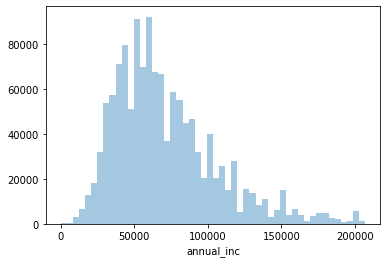

In [315]:
# annual income

df_copy1['annual_inc'] = df_copy1['annual_inc'].fillna(df_copy1['annual_inc'].median())

inc_no_outliers = plot_feature(df_copy1['annual_inc'], iq_range=0.92, return_mask = True)
df_copy1['annual_inc'] = df_copy1['annual_inc'].mask(inc_no_outliers == False)
df_copy1['annual_inc'] = df_copy1['annual_inc'].fillna(df_copy1['annual_inc'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


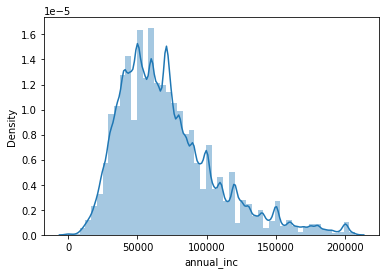

In [316]:
sns.distplot(df_copy1['annual_inc'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


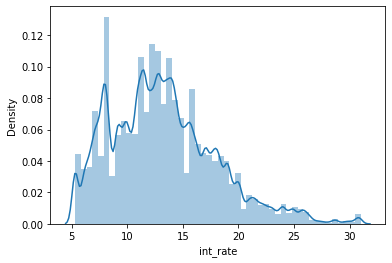

In [317]:
#No outliers found

sns.distplot(df_copy1['int_rate'])

In [318]:
df_copy1['int_rate'].max()

30.99

In [319]:
df_copy1.groupby('loan_status')['int_rate'].agg([np.mean, np.min, np.max])

,mean,amin,amax
loan_status,,,
Charged Off,15.710714,5.31,30.99
Default,16.181750,5.32,30.74
Does not meet the credit policy. Status:Charged Off,14.597148,7.43,21.64
Does not meet the credit policy. Status:Fully Paid,13.978642,6.00,21.64
Fully Paid,12.623288,5.31,30.99


In [320]:
df_copy1[(df_copy1['annual_inc'] <= 26000.0)].groupby('loan_status')['int_rate'].agg([np.mean, np.min, np.max])

,mean,amin,amax
loan_status,,,
Charged Off,15.830862,5.31,30.99
Default,19.785000,14.08,25.49
Does not meet the credit policy. Status:Charged Off,13.190333,7.43,21.27
Does not meet the credit policy. Status:Fully Paid,13.385792,7.43,20.11
Fully Paid,13.920378,5.31,30.99


86.73 375.04 1085.48 998.75


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


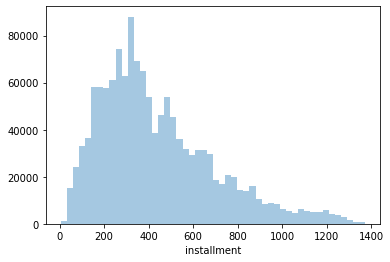

In [322]:
# installment

inst_no_outliers = plot_feature(df_copy1['installment'], iq_range=0.94, return_mask = True)
df_copy1['installment'] = df_copy1['installment'].mask(inst_no_outliers == False)
df_copy1['installment'] = df_copy1['installment'].fillna(df_copy1['installment'].mean())

In [323]:
df_copy1.groupby('loan_status')['installment'].agg([np.mean, np.min, np.max])

,mean,amin,amax
loan_status,,,
Charged Off,463.481298,21.62,1372.97
Default,438.939250,50.45,1328.39
Does not meet the credit policy. Status:Charged Off,305.158804,15.91,926.83
Does not meet the credit policy. Status:Fully Paid,287.069225,15.67,940.14
Fully Paid,430.662077,4.93,1373.22


In [324]:
df_copy1[(df_copy1['annual_inc'] >= 100000.0)].groupby(by = ['loan_status','term'])['installment'].agg([np.size, np.mean, np.min, np.max])

size  ...     amax
loan_status                                        term                  ...         
Charged Off                                         36 months   21373.0  ...  1372.97
                                                    60 months   19026.0  ...  1318.57
Default                                             36 months       3.0  ...   339.79
                                                    60 months       2.0  ...   946.68
Does not meet the credit policy. Status:Charged...  36 months      86.0  ...   926.83
                                                    60 months      14.0  ...   646.18
Does not meet the credit policy. Status:Fully Paid  36 months     246.0  ...   926.83
                                                    60 months      39.0  ...   685.37
Fully Paid                                          36 months  156938.0  ...  1373.22
                                                    60 months   53106.0  ...  1318.57

[10 rows x 4 columns]

In [325]:
df_copy1[(df_copy1['annual_inc'] >= 100000.0)].groupby(by = ['loan_status','term'])['installment','loan_amnt', 'int_rate'].agg([np.median, np.mean])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


installment  ...   int_rate
                                                                   median  ...       mean
loan_status                                        term                    ...           
Charged Off                                         36 months     635.910  ...  13.345236
                                                    60 months     637.380  ...  17.500965
Default                                             36 months     183.360  ...  12.646667
                                                    60 months     808.330  ...  17.490000
Does not meet the credit policy. Status:Charged...  36 months     511.155  ...  14.792791
                                                    60 months     323.990  ...  17.741429
Does not meet the credit policy. Status:Fully Paid  36 months     383.380  ...  14.053740
                                                    60 months     346.000  ...  16.763333
Fully Paid                                          36 months     550.430  ...  10.723425
                                                    60 months     578.420  ...  15.510040

[10 rows x 6 columns]

In [326]:
df_copy1['installment'].max()

1373.22

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


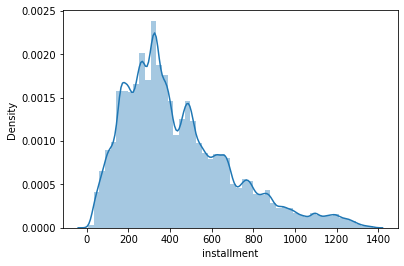

In [329]:
sns.distplot(df_copy1['installment'])

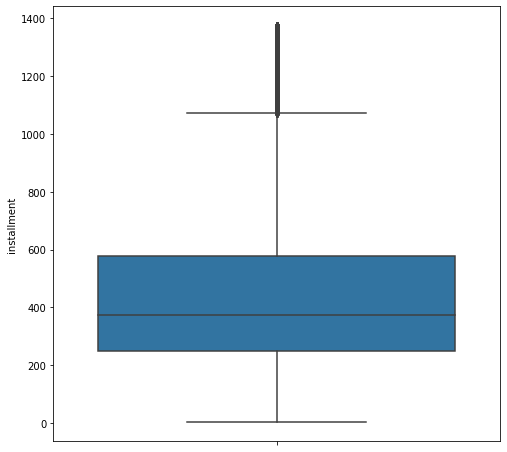

In [330]:
plt.figure(figsize=(8,8))
sns.boxplot( y=df_copy1['installment'] )

25.7 52.2 78.2 52.5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


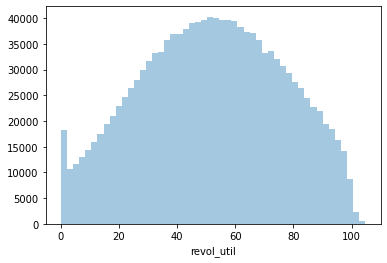

In [331]:
# revol_util

df_copy1['revol_util'] = df_copy1['revol_util'].fillna(df_copy1['revol_util'].median())
ru_no_outliers = plot_feature(df_copy1['revol_util'], iq_range=0.67, return_mask = True)
df_copy1['revol_util'] = df_copy1['revol_util'].mask(ru_no_outliers == False)
df_copy1['revol_util'] = df_copy1['revol_util'].fillna(df_copy1['revol_util'].mean())


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


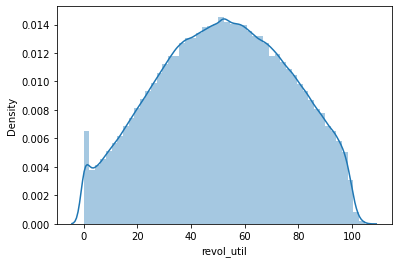

In [332]:
sns.distplot(df_copy1['revol_util'])

In [333]:
df_copy1['revol_util'].max()

104.7

In [334]:
df_copy1['pub_rec'].value_counts()

0.0     1119921
1.0      191035
2.0       24448
3.0        7403
4.0        2630
5.0        1267
6.0         636
7.0         283
8.0         160
9.0          83
10.0         57
11.0         40
12.0         27
13.0         18
15.0          9
21.0          6
18.0          6
14.0          5
16.0          5
19.0          5
17.0          3
28.0          3
20.0          3
49.0          2
24.0          2
22.0          2
86.0          1
25.0          1
63.0          1
61.0          1
54.0          1
23.0          1
47.0          1
46.0          1
40.0          1
37.0          1
34.0          1
Name: pub_rec, dtype: int64

0.0 0.0 86.0 86.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'In case if there are outliers in this column'

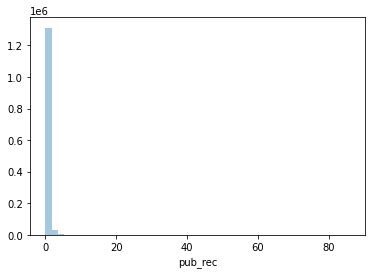

In [335]:
# pub_rec: just replaced nan vlues in this column

df_copy1['pub_rec'] = df_copy1['pub_rec'].fillna(df_copy1['pub_rec'].median())
pr_no_outliers = plot_feature(df_copy1['pub_rec'], iq_range=1, return_mask = True)

'''In case if there are outliers in this column'''
# df_copy['pub_rec'] = df_copy['pub_rec'].mask(pr_no_outliers == False)
# df_copy['pub_rec'] = df_copy['pub_rec'].mask(df_copy['pub_rec'].isna(), df_copy['pub_rec'].median())

In [ ]:
df_copy['pub_rec'].value_counts().sort_values(ascending=False)

0.0     1119919
1.0      191027
2.0       24448
3.0        7402
4.0        2630
5.0        1267
6.0         636
7.0         283
8.0         160
9.0          83
10.0         57
11.0         40
12.0         27
13.0         18
15.0          9
21.0          6
18.0          6
14.0          5
16.0          5
19.0          5
17.0          3
28.0          3
20.0          3
49.0          2
24.0          2
22.0          2
37.0          1
23.0          1
40.0          1
46.0          1
47.0          1
25.0          1
54.0          1
61.0          1
63.0          1
86.0          1
34.0          1
Name: pub_rec, dtype: int64

In [336]:
df_copy1['avg_cur_bal'].max()

958084.0

In [337]:
df_copy1.groupby(by = ['loan_status','term'])['pub_rec'].agg([np.size, np.mean, np.median, np.min, np.max])

size  ...  amax
loan_status                                        term                  ...      
Charged Off                                         36 months  163252.0  ...  86.0
                                                    60 months  105307.0  ...  19.0
Default                                             36 months      25.0  ...   3.0
                                                    60 months      15.0  ...   1.0
Does not meet the credit policy. Status:Charged...  36 months     649.0  ...   2.0
                                                    60 months     112.0  ...   1.0
Does not meet the credit policy. Status:Fully Paid  36 months    1789.0  ...   5.0
                                                    60 months     199.0  ...   1.0
Fully Paid                                          36 months  857491.0  ...  63.0
                                                    60 months  219260.0  ...  47.0

[10 rows x 5 columns]

In [338]:
df_copy1['avg_cur_bal'].value_counts().sample(31)

9756.0       28
69811.0       1
47713.0       2
17143.0      23
30511.0       8
10464.0      24
62012.0       2
126844.0      1
87473.0       1
38838.0       5
100344.0      1
15176.0      27
117.0        11
7589.0       44
17114.0      22
7102.0       38
32508.0      11
38238.0       8
63799.0       2
55582.0       1
17228.0      23
39482.0       6
17513.0      23
30123.0      10
31465.0      10
36388.0       6
57388.0       2
22542.0      24
66436.0       4
2694.0      137
49659.0       4
Name: avg_cur_bal, dtype: int64

In [339]:
df_copy1.groupby(by = ['loan_status','term'])['loan_amnt', 'avg_cur_bal'].agg([np.size, np.mean, np.median, np.max])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


loan_amnt  ... avg_cur_bal
                                                                   size  ...        amax
loan_status                                        term                  ...            
Charged Off                                         36 months  163252.0  ...    355824.0
                                                    60 months  105307.0  ...    253486.0
Default                                             36 months      25.0  ...     44796.0
                                                    60 months      15.0  ...     24169.0
Does not meet the credit policy. Status:Charged...  36 months     649.0  ...         NaN
                                                    60 months     112.0  ...         NaN
Does not meet the credit policy. Status:Fully Paid  36 months    1789.0  ...         NaN
                                                    60 months     199.0  ...         NaN
Fully Paid                                          36 months  857491.0  ...    958084.0
                                                    60 months  219260.0  ...    497484.0

[10 rows x 8 columns]

477.0 7407.0 72391.0 71914.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


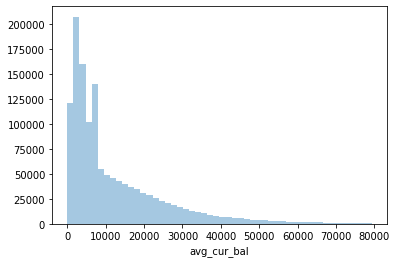

In [340]:
# avg_cur_bal

df_copy1['avg_cur_bal'] = df_copy1['avg_cur_bal'].fillna(df_copy1['avg_cur_bal'].median())
avgcb_no_outliers = plot_feature(df_copy1['avg_cur_bal'], iq_range=0.98, return_mask = True)
df_copy1['avg_cur_bal'] = df_copy1['avg_cur_bal'].mask(avgcb_no_outliers == False)
df_copy1['avg_cur_bal'] = df_copy1['avg_cur_bal'].fillna(df_copy1['avg_cur_bal'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


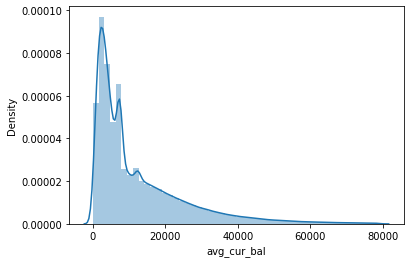

In [341]:
sns.distplot(df_copy1['avg_cur_bal'])

In [342]:
np.sort(df_copy1['mort_acc'].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 34., 35., 36., 37., 47., 51.,
       nan])

In [343]:
df_copy1.groupby(by = ['loan_status','term'])['loan_amnt', 'mort_acc'].agg([np.size, np.mean, np.median, np.max])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


loan_amnt  ... mort_acc
                                                                   size  ...     amax
loan_status                                        term                  ...         
Charged Off                                         36 months  163252.0  ...     27.0
                                                    60 months  105307.0  ...     29.0
Default                                             36 months      25.0  ...      5.0
                                                    60 months      15.0  ...      7.0
Does not meet the credit policy. Status:Charged...  36 months     649.0  ...      NaN
                                                    60 months     112.0  ...      NaN
Does not meet the credit policy. Status:Fully Paid  36 months    1789.0  ...      NaN
                                                    60 months     199.0  ...      NaN
Fully Paid                                          36 months  857491.0  ...     51.0
                                                    60 months  219260.0  ...     37.0

[10 rows x 8 columns]

0.0 1.0 7.0 7.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


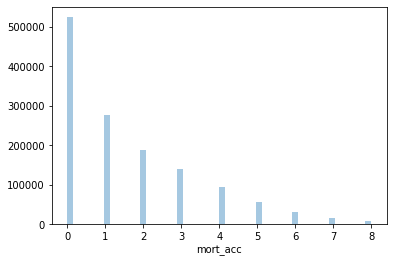

In [344]:
# mort_acc
df_copy1['mort_acc'] = df_copy1['mort_acc'].fillna(df_copy1['mort_acc'].median())
ma_no_outliers = plot_feature(df_copy1['mort_acc'], iq_range=0.97, return_mask = True)
df_copy1['mort_acc'] = df_copy1['mort_acc'].mask(ma_no_outliers == False)
df_copy1['mort_acc'] = df_copy1['mort_acc'].fillna(df_copy1['mort_acc'].mean())


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


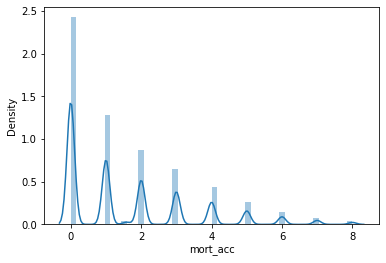

In [345]:
sns.distplot(df_copy1['mort_acc'])

In [346]:
df_copy1.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'fico_range_low', 'pub_rec',
       'revol_util', 'initial_list_status', 'avg_cur_bal', 'mort_acc'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


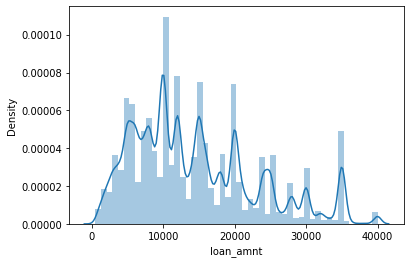

In [348]:
# loan_amount
'''Its look like there is no outliers in this column '''

sns.distplot(df_copy1['loan_amnt'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


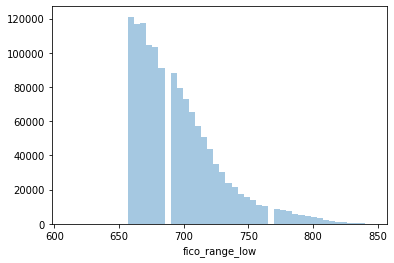

In [349]:
#fico_range_low
'''No outliers'''
sns.distplot(df_copy1['fico_range_low'], kde = False)

In [350]:
df_copy1['fico_range_low'].min()

610.0

In [351]:
df_copy1['fico_range_low'].max()

845.0

In [370]:
#save cleaned data to working directory
df_copy.to_csv('clean_accepted.csv') 

In [373]:
corr_mat = df_copy1.corr()

In [374]:
corr_mat

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,fico_range_low,pub_rec,revol_util,initial_list_status,avg_cur_bal,mort_acc
loan_amnt,1.000000,0.380793,0.141432,0.950821,0.145088,0.112555,-0.181240,0.454176,0.224176,-0.065173,-0.154031,0.063740,0.101525,-0.065601,0.108446,0.066265,0.233847,0.223631
term,0.380793,1.000000,0.416939,0.145656,0.432513,0.068600,-0.101799,0.103484,0.128820,-0.175801,-0.052633,0.174914,-0.001898,-0.019507,0.063894,0.102455,0.090414,0.102354
int_rate,0.141432,0.416939,1.000000,0.147923,0.975539,-0.006079,0.070226,-0.104880,0.255657,-0.258811,0.113070,0.258553,-0.405484,0.052974,0.242926,-0.121431,-0.083172,-0.083491
installment,0.950821,0.145656,0.147923,1.000000,0.143610,0.098504,-0.150689,0.431453,0.225795,-0.050100,-0.141101,0.048812,0.051949,-0.054293,0.127335,0.022865,0.204123,0.191012
sub_grade,0.145088,0.432513,0.975539,0.143610,1.000000,-0.008081,0.074441,-0.105593,0.257422,-0.267255,0.118851,0.268451,-0.424400,0.060570,0.250204,-0.102819,-0.088722,-0.085426
emp_length,0.112555,0.068600,-0.006079,0.098504,-0.008081,1.000000,-0.182197,0.161649,-0.017170,0.028392,-0.013064,-0.028887,0.014932,0.014321,0.046638,0.014109,0.111512,0.178189
home_ownership,-0.181240,-0.101799,0.070226,-0.150689,0.074441,-0.182197,1.000000,-0.234175,-0.006703,-0.070615,0.032033,0.070389,-0.107046,0.005723,-0.020295,-0.034710,-0.493499,-0.503833
annual_inc,0.454176,0.103484,-0.104880,0.431453,-0.105593,0.161649,-0.234175,1.000000,0.029450,0.061626,-0.008717,-0.062071,0.094082,-0.015676,0.061376,0.064322,0.364897,0.309521
verification_status,0.224176,0.128820,0.255657,0.225795,0.257422,-0.017170,-0.006703,0.029450,1.000000,-0.089169,0.022455,0.087879,-0.130683,0.034848,0.116876,-0.049737,0.022132,0.031219
loan_status,-0.065173,-0.175801,-0.258811,-0.050100,-0.267255,0.028392,-0.070615,0.061626,-0.089169,1.000000,-0.020498,-0.997927,0.130786,-0.026081,-0.059848,-0.006567,0.077183,0.072507


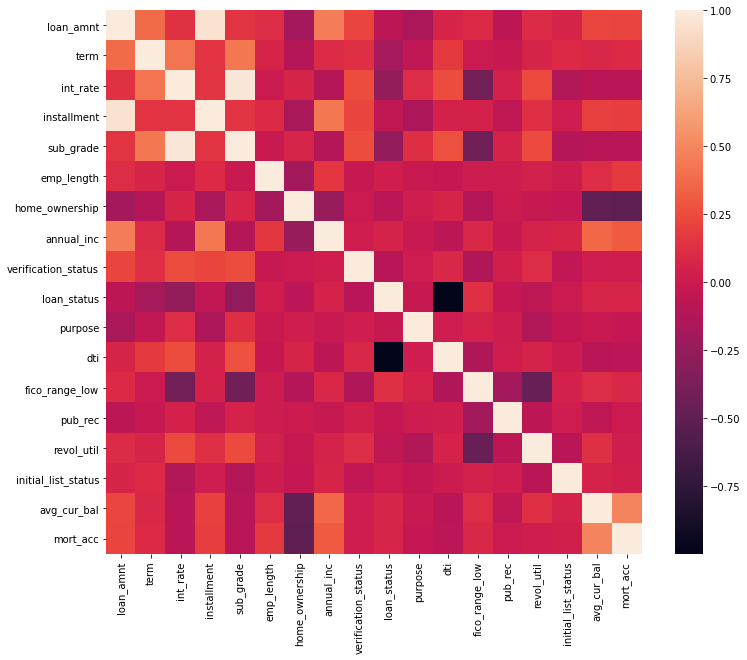

In [376]:
plt.figure(figsize = (12,10))
sns.heatmap(corr_mat)

## **Rejected file**

### Eda for rejected file

In [ ]:
# arr = pd.DataFrame(np.array([[1,2,3],[3,4,5],[4,5,6]]), columns = ['a', 'b', 'c'])

In [ ]:
# arr

In [ ]:
# arr['extra'] = np.zeros(3)

In [ ]:
# arr

In [ ]:
# df_rejected.shape

(27648741, 9)

In [ ]:
# df_rejected.head(10)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0
5,15000.0,2007-05-27,Trinfiniti,645.0,0%,105xx,NY,3 years,0.0
6,10000.0,2007-05-27,NOTIFYi Inc,693.0,10%,210xx,MD,< 1 year,0.0
7,3900.0,2007-05-27,For Justin.,700.0,10%,469xx,IN,2 years,0.0
8,3000.0,2007-05-28,title?,694.0,10%,808xx,CO,4 years,0.0
9,2500.0,2007-05-28,timgerst,573.0,11.76%,407xx,KY,4 years,0.0


In [ ]:
# df_rejected.columns

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

In [ ]:
# for i in df_accepted.columns:
#   if 'sc' in i.lower():
#     print(i)
   

desc


In [ ]:
# miss_values_rejected = null_values(df_rejected)
# miss_values_rejected.head(6)

Dataframe has 9 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Risk_Score,18497630,66.90
Employment Length,951355,3.44
Loan Title,1303,0.00
Policy Code,918,0.00
Zip Code,293,0.00
State,22,0.00


In [ ]:
# common_columns = np.intersect1d(df_accepted.columns, df_rejected.columns)